In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import itertools
import csv


# JSON API
import requests
import json

# data visualization
import matplotlib
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

# ignore warnings
import warnings

In [2]:
base_url = 'http://python.zach.lol/access.log'

In [343]:
with open('access.log') as file:
    lines = file.read().splitlines()
    
    with open('access.csv', 'w+') as csvfile:
        w = csv.writer(csvfile)
        w.writerows(lines)

In [384]:
df = pd.read_csv('access.csv', delimiter=' ', names=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'))
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11
0,"9,7,.,1,0,5,.,1,9,.,5,8,",",-,",",-,",",[,1,6,/,A,p,r,/,2,0,1,9,:,1,9,:,3,4,:,4,2,",",+,0,0,0,0,],",","""""""",G,E,T,",",/,a,p,i,/,v,1,/,s,a,l,e,s,?,p,a,g,e,=,8,1,",",H,T,T,P,/,1,.,1,"""""""",",",2,0,0,",",5,1,2,4,9,5,",","""""""",-,"""""""",",","""""""",p,y,t,h,o,n,-,r,e,q,u,e,s,t,s,/,2,.,2,1,..."


In [374]:
df.shape

(13974, 12)

In [375]:
def prep_log(df):
    df['0'].replace(regex=True, inplace=True, to_replace=r',', value=r'')
    df['1'].replace(regex=True, inplace=True, to_replace=r',', value=r'')
    df['2'].replace(regex=True, inplace=True, to_replace=r',', value=r'')
    df['3'].replace(regex=True, inplace=True, to_replace=r',', value=r'')
    df['4'].replace(regex=True, inplace=True, to_replace=r',', value=r'')
    df['5'].replace(regex=True, inplace=True, to_replace=r',', value=r'')
    df['6'].replace(regex=True, inplace=True, to_replace=r',', value=r'')
    df['7'].replace(regex=True, inplace=True, to_replace=r',', value=r'')
    df['8'].replace(regex=True, inplace=True, to_replace=r',', value=r'')
    df['9'].replace(regex=True, inplace=True, to_replace=r',', value=r'')
    df['10'].replace(regex=True, inplace=True, to_replace=r',', value=r'')
    df['11'].replace(regex=True, inplace=True, to_replace=r',', value=r'')
    df['5'].replace(regex=True, inplace=True, to_replace=r'""""', value=r'')
    df['7'].replace(regex=True, inplace=True, to_replace=r'""""', value=r'')
    df['10'].replace(regex=True, inplace=True, to_replace=r'""""', value=r'')
    df['11'].replace(regex=True, inplace=True, to_replace=r'""""', value=r'')
    df.drop(columns=['1', '2'], axis=1, inplace=True)
    df['4'].replace(regex=True, inplace=True, to_replace=r']', value=r'')
    df['3'] = df['3'].str[1:]
    df['3'] = df['3'] + df['4']
    df.rename(index=str, columns={'0':'IP', '3':'DateTime', '4':'UTC', '5':'method', '6':'path', '7':'protocol_version', '8':'status_code', '9':'size', '10':'unknown', '11':'user_agent' }, inplace=True)
    df['DateTime'].replace(regex=True, inplace=True, to_replace=r'Apr', value=r'04')
    df['DateTime'].replace(regex=True, inplace=True, to_replace=r'/', value=r'-')
    df['DateTime'] = pd.to_datetime(df.DateTime.str.replace(':', ' ', 1))
    df['size'] = df['size'].astype('int')
    return df

In [385]:
def prep_log(df):
    cols = list(df)
    for col in cols:
        df[col].replace(regex=True, inplace=True, to_replace=r',', value=r'')
    
    df['5'].replace(regex=True, inplace=True, to_replace=r'""""', value=r'')
    df['7'].replace(regex=True, inplace=True, to_replace=r'""""', value=r'')
    df['10'].replace(regex=True, inplace=True, to_replace=r'""""', value=r'')
    df['11'].replace(regex=True, inplace=True, to_replace=r'""""', value=r'')
    df.drop(columns=['1', '2'], axis=1, inplace=True)
    df['4'].replace(regex=True, inplace=True, to_replace=r']', value=r'')
    df['3'] = df['3'].str[1:]
    df['3'] = df['3'] + df['4']
    df.rename(index=str, columns={'0':'IP', '3':'DateTime', '4':'UTC', '5':'method', '6':'path', '7':'protocol_version', '8':'status_code', '9':'size', '10':'unknown', '11':'user_agent' }, inplace=True)
    df['DateTime'].replace(regex=True, inplace=True, to_replace=r'Apr', value=r'04')
    df['DateTime'].replace(regex=True, inplace=True, to_replace=r'/', value=r'-')
    df['DateTime'] = pd.to_datetime(df.DateTime.str.replace(':', ' ', 1))
    df['size'] = df['size'].astype('int')
    
    return df

In [386]:
prep_log(df)
df.head()

,IP,DateTime,UTC,method,path,protocol_version,status_code,size,unknown,user_agent
0,97.105.19.58,2019-04-16 19:34:42,+0000,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,-,python-requests/2.21.0
1,97.105.19.58,2019-04-16 19:34:42,+0000,GET,/api/v1/items,HTTP/1.1,200,3561,-,python-requests/2.21.0
2,97.105.19.58,2019-04-16 19:34:44,+0000,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,-,python-requests/2.21.0
3,97.105.19.58,2019-04-16 19:34:46,+0000,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,-,python-requests/2.21.0
4,97.105.19.58,2019-04-16 19:34:48,+0000,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,-,python-requests/2.21.0


In [348]:
def col_val_counts(df):
    cols = list(df)
    for col in cols:
        count = df[col].value_counts()
        print(str(col) +':' + str(count))

In [349]:
col_val_counts(df)

IP:97.105.19.58      11998
173.173.113.51     1059
72.181.113.170      613
72.181.105.81       246
24.26.242.9          21
68.201.219.223       21
52.87.230.102         2
35.175.171.137        2
70.121.214.34         2
34.207.64.242         1
3.92.201.136          1
52.90.165.200         1
34.229.70.250         1
52.91.30.150          1
35.174.209.2          1
3.88.129.158          1
54.172.14.223         1
54.145.52.184         1
45.23.250.16          1
Name: IP, dtype: int64
DateTime:2019-04-16 19:56:10    9
2019-04-16 19:49:58    8
2019-04-16 20:01:30    7
2019-04-16 20:52:17    6
2019-04-16 20:02:59    6
2019-04-16 20:12:23    6
2019-04-16 21:38:42    6
2019-04-16 20:01:34    5
2019-04-16 21:52:27    5
2019-04-16 19:51:50    5
2019-04-16 21:48:23    5
2019-04-16 20:51:31    5
2019-04-16 20:38:55    5
2019-04-16 19:48:18    5
2019-04-16 19:51:15    5
2019-04-16 21:38:57    5
2019-04-16 19:35:38    5
2019-04-16 19:53:45    5
2019-04-16 21:25:30    5
2019-04-16 21:37:58    5
2019-04-1

In [350]:
df.set_index('DateTime', inplace=True)
df.head()

,IP,UTC,method,path,protocol_version,status_code,size,unknown,user_agent
DateTime,,,,,,,,,
2019-04-16 19:34:42,97.105.19.58,+0000,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,-,python-requests/2.21.0
2019-04-16 19:34:42,97.105.19.58,+0000,GET,/api/v1/items,HTTP/1.1,200,3561,-,python-requests/2.21.0
2019-04-16 19:34:44,97.105.19.58,+0000,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,-,python-requests/2.21.0
2019-04-16 19:34:46,97.105.19.58,+0000,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,-,python-requests/2.21.0
2019-04-16 19:34:48,97.105.19.58,+0000,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,-,python-requests/2.21.0


In [351]:
df.tail()

,IP,UTC,method,path,protocol_version,status_code,size,unknown,user_agent
DateTime,,,,,,,,,
2019-04-17 12:55:12,97.105.19.58,+0000,GET,/api/v1/sales?page=62,HTTP/1.1,200,511544,-,python-requests/2.21.0
2019-04-17 12:55:12,97.105.19.58,+0000,GET,/api/v1/sales?page=65,HTTP/1.1,200,511201,-,python-requests/2.21.0
2019-04-17 12:55:13,97.105.19.58,+0000,GET,/api/v1/sales?page=73,HTTP/1.1,200,511781,-,python-requests/2.21.0
2019-04-17 12:55:13,97.105.19.58,+0000,GET,/api/v1/sales?page=69,HTTP/1.1,200,510136,-,python-requests/2.21.0
2019-04-17 12:55:14,97.105.19.58,+0000,GET,/api/v1/sales?page=71,HTTP/1.1,200,510166,-,python-requests/2.21.0


In [352]:
df['2019-04-16 20:57':'2019-04-16 20:59']

,IP,UTC,method,path,protocol_version,status_code,size,unknown,user_agent
DateTime,,,,,,,,,
2019-04-16 20:57:00,97.105.19.58,+0000,GET,/api/v1/sales?page=99,HTTP/1.1,200,512312,-,python-requests/2.21.0
2019-04-16 20:57:01,97.105.19.58,+0000,GET,/api/v1/stores,HTTP/1.1,200,1328,-,python-requests/2.21.0
2019-04-16 20:57:01,97.105.19.58,+0000,GET,/api/v1/sales?page=9,HTTP/1.1,200,500125,-,python-requests/2.20.1
2019-04-16 20:57:02,97.105.19.58,+0000,GET,/api/v1/sales?page=100,HTTP/1.1,200,512674,-,python-requests/2.21.0
2019-04-16 20:57:03,97.105.19.58,+0000,GET,/api/v1/sales?page=10,HTTP/1.1,200,500113,-,python-requests/2.20.1
2019-04-16 20:57:04,97.105.19.58,+0000,GET,/api/v1/sales?page=101,HTTP/1.1,200,510509,-,python-requests/2.21.0
2019-04-16 20:57:05,97.105.19.58,+0000,GET,/api/v1/sales?page=11,HTTP/1.1,200,501935,-,python-requests/2.20.1
2019-04-16 20:57:06,97.105.19.58,+0000,GET,/api/v1/sales?page=102,HTTP/1.1,200,512612,-,python-requests/2.21.0
2019-04-16 20:57:07,97.105.19.58,+0000,GET,/api/v1/sales?page=12,HTTP/1.1,200,500064,-,python-requests/2.20.1


In [353]:
df['size'] = df['size'].astype('int')

In [354]:
df['size'].resample('5min').sum()

DateTime
2019-04-16 19:30:00      5108561
2019-04-16 19:35:00    109583940
2019-04-16 19:40:00    147923501
2019-04-16 19:45:00    233684428
2019-04-16 19:50:00    254375516
2019-04-16 19:55:00    250629854
2019-04-16 20:00:00    251435920
2019-04-16 20:05:00    194763358
2019-04-16 20:10:00    145471906
2019-04-16 20:15:00     45042992
2019-04-16 20:20:00    137715116
2019-04-16 20:25:00    110938377
2019-04-16 20:30:00    100617959
2019-04-16 20:35:00    219777913
2019-04-16 20:40:00    247002050
2019-04-16 20:45:00    253479011
2019-04-16 20:50:00    247697289
2019-04-16 20:55:00    140189185
2019-04-16 21:00:00     87095504
2019-04-16 21:05:00    136623307
2019-04-16 21:10:00     88130495
2019-04-16 21:15:00    107872817
2019-04-16 21:20:00     67656495
2019-04-16 21:25:00    117392557
2019-04-16 21:30:00     99551009
2019-04-16 21:35:00    226520916
2019-04-16 21:40:00    158145891
2019-04-16 21:45:00    165141301
2019-04-16 21:50:00    185302535
2019-04-16 21:55:00    107449114
 

In [355]:
df.resample('H').count()

,IP,UTC,method,path,protocol_version,status_code,size,unknown,user_agent
DateTime,,,,,,,,,
2019-04-16 19:00:00,2244,2244,2244,2244,2244,2244,2244,2244,2244
2019-04-16 20:00:00,4587,4587,4587,4587,4587,4587,4587,4587,4587
2019-04-16 21:00:00,3430,3430,3430,3430,3430,3430,3430,3430,3430
2019-04-16 22:00:00,1684,1684,1684,1684,1684,1684,1684,1684,1684
2019-04-16 23:00:00,2,2,2,2,2,2,2,2,2
2019-04-17 00:00:00,8,8,8,8,8,8,8,8,8
2019-04-17 01:00:00,380,380,380,380,380,380,380,380,380
2019-04-17 02:00:00,284,284,284,284,284,284,284,284,284
2019-04-17 03:00:00,807,807,807,807,807,807,807,807,807


In [356]:
df = df.tz_localize('utc').tz_convert('America/Chicago')
df.head()

,IP,UTC,method,path,protocol_version,status_code,size,unknown,user_agent
DateTime,,,,,,,,,
2019-04-16 14:34:42-05:00,97.105.19.58,+0000,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,-,python-requests/2.21.0
2019-04-16 14:34:42-05:00,97.105.19.58,+0000,GET,/api/v1/items,HTTP/1.1,200,3561,-,python-requests/2.21.0
2019-04-16 14:34:44-05:00,97.105.19.58,+0000,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,-,python-requests/2.21.0
2019-04-16 14:34:46-05:00,97.105.19.58,+0000,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,-,python-requests/2.21.0
2019-04-16 14:34:48-05:00,97.105.19.58,+0000,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,-,python-requests/2.21.0


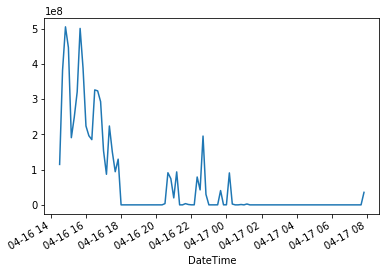

In [357]:
df['size'].resample('10min').sum().plot()

In [358]:
df.reset_index(inplace=True)
df.head()

,DateTime,IP,UTC,method,path,protocol_version,status_code,size,unknown,user_agent
0,2019-04-16 14:34:42-05:00,97.105.19.58,+0000,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,-,python-requests/2.21.0
1,2019-04-16 14:34:42-05:00,97.105.19.58,+0000,GET,/api/v1/items,HTTP/1.1,200,3561,-,python-requests/2.21.0
2,2019-04-16 14:34:44-05:00,97.105.19.58,+0000,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,-,python-requests/2.21.0
3,2019-04-16 14:34:46-05:00,97.105.19.58,+0000,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,-,python-requests/2.21.0
4,2019-04-16 14:34:48-05:00,97.105.19.58,+0000,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,-,python-requests/2.21.0


In [387]:
df.groupby('IP')['size'].sum()

IP
173.173.113.51     414728524
24.26.242.9          3491558
3.88.129.158            3561
3.92.201.136              42
34.207.64.242            162
34.229.70.250            162
35.174.209.2             162
35.175.171.137          3603
45.23.250.16            1328
52.87.230.102         494067
52.90.165.200            162
52.91.30.150              42
54.145.52.184            162
54.172.14.223            162
68.201.219.223         48081
70.121.214.34            204
72.181.105.81       94645218
72.181.113.170     258029494
97.105.19.58      5515467048
Name: size, dtype: int64

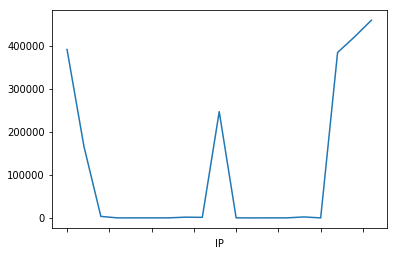

In [388]:
df.groupby('IP')['size'].mean().plot()